In [1]:
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, BatchNormalization, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [2]:
# load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# one hot encode target values
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# convert from integers to floats
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalize to range 0-1
X_train = X_train / 255.0
X_test = X_test / 255.0

170500096/170498071 [==============================] - 2s 0us/step


In [3]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)       

In [4]:
# Data Augmentation
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)

# Run
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit_generator(datagen.flow(X_train, y_train, batch_size=64), epochs=50, validation_data=(X_test, y_test), verbose=1)

Epoch 1/50
782/782 [==============================] - 37s 47ms/step - loss: 1.7690 - accuracy: 0.3905 - val_loss: 1.3019 - val_accuracy: 0.5296
Epoch 2/50
782/782 [==============================] - 29s 37ms/step - loss: 1.2572 - accuracy: 0.5461 - val_loss: 1.1306 - val_accuracy: 0.6031
Epoch 3/50
782/782 [==============================] - 30s 39ms/step - loss: 1.0798 - accuracy: 0.6183 - val_loss: 0.9117 - val_accuracy: 0.6752
Epoch 4/50
782/782 [==============================] - 30s 38ms/step - loss: 0.9488 - accuracy: 0.6674 - val_loss: 0.7600 - val_accuracy: 0.7295
Epoch 5/50
782/782 [==============================] - 30s 39ms/step - loss: 0.8714 - accuracy: 0.6960 - val_loss: 0.8057 - val_accuracy: 0.7250
Epoch 6/50
782/782 [==============================] - 29s 38ms/step - loss: 0.8005 - accuracy: 0.7229 - val_loss: 0.6932 - val_accuracy: 0.7566
Epoch 7/50
782/782 [==============================] - 30s 39ms/step - loss: 0.7528 - accuracy: 0.7428 - val_loss: 0.7503 - val_accuracy:

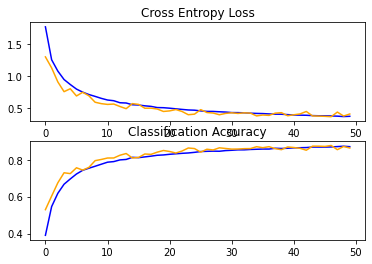

In [5]:
# plot loss
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='test')
# plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='test')

In [6]:
# save model
model.save('final_model.h5')